<a href="https://colab.research.google.com/github/Yashmalhotra98/Text_mining_Sentiment_Analysis/blob/main/Text_mining_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Connect to Google Drive


        

*   Initiate the connection with Google Drive  





In [155]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per note"book
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



*   Specify the Google Drive file ID



In [156]:
# Download a file based on it's file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '1KrtdsC4zp8SrN_-skKMe7BK6EHlmlSxV'
downloaded = drive.CreateFile({'id':file_id})

# Save file in the Colab Memory
downloaded.GetContentFile('tweet_data.csv')

1.2 Load and Analyze Dataset

In [157]:
import pandas as pd
import numpy as np



*   Read DataFrame stored in Google drive under .csv format



In [158]:
df = pd.read_csv("tweet_data.csv")



*   Use the smaple method to look at some random tweets present in our dataset



In [159]:
df.sample(10)

,textID,tweet_text,sentiment
9315,1966312002,@dnbchik ahhh...Lily's new kitten just took a ...,negative
5267,1963114861,@Ross_C I can't find the original on blip.fm a...,negative
18650,1753886131,"@cssglobe hahah, you own lab.hr I own lab.ba,...",positive
11627,1694929615,thanks @josephadamx3,positive
1577,1957756204,I think I love a part of me saying some cynica...,positive
12999,1695964379,"Hell, my iTunes music library is even bipolar!",negative
17438,1753466776,@morningroc Dont worry man. You'll see me just...,positive
2838,1961098072,Wow that was fast...next up Soderling or Ferre...,negative
16805,1753217758,is at the salon with my mom happy mothers day...,positive
1443,1957686686,My record player has decided to die. Why on Fr...,negative




*   Check how many tweets there are in total



In [160]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727




*   Print a tweet and its sentiment based on a tweet ID



In [161]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [162]:
print('Tweet: {}'.format(tweet['tweet_text']))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


1.3 Dataset Visulaization

     1.3.1 Matplotlib
          *   import the pyplot module form the matplotlib package



In [163]:
import matplotlib.pyplot as plt 



*   pyplot helps understanding and representing how tweets are distributed over the dataset


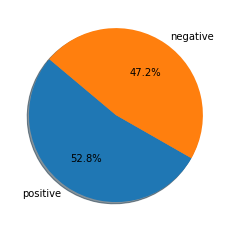

In [164]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels = sentiment_count.index,
        autopct = '%1.1f%%', shadow =True, startangle =140)
plt.show()



*   Print the count of positive and negative tweets



In [165]:
print("Number of + tweets: {}".format(df[df["sentiment"] == 'positive'].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"] == 'negative'].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


1.3.2 WorldClouds


*   The Wordclouds package is a very useful to get a quick overview of most recurrent words in the text corpus



In [166]:
from wordcloud import WordCloud


*   What are the words most often present in positive tweets?





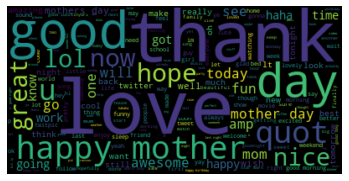

In [167]:
pos_tweets = df[df["sentiment"]== "positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud =WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()



*   What are the words most often present in negative tweets?



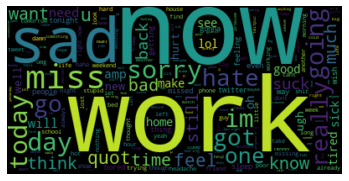

In [168]:
pos_tweets = df[df["sentiment"]== "negative"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud =WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

SECTION 2 : TEXT NORMALIZATION

Text Normalization is actually aimed at reducing randomness in a particular piece of text. To predict the sentiment of a sentence or a group of sentences which have a similar meaning even with different spelling or expressions.
We as humans can interpret and understand the same. But for Machines soooooo != so, similarly Fun != Funny and learn != learning, etc.


Since Machines aren't aware of languages as a concept, they deny the hypothesis that ne word is different from another as long as there spelling is different like we humans would do in a foreign language.


To help machines learn & recognize the sentiment of such sentences, we can make it easier for them by providing clean and normal senctences, simply by reducing randomness in words as much as we possibly can.

Throught Text Normalization our goal is to provide machines with easier set of words to interpret & manipulate.

First, we will use some text mining techniques to clean up certain common use of words & extract features present in written text, whether they are specific to Twitter or not.

This includes user tags, or words repetition, among others.

We then try to transform the remaining words using different NLP Techniques, so they are already to be converted into numbers and use by machine learing models.

Text Cleaning: Twitter Specific


1.   Remove or replace all items that do not provide additional information.




Keep in mind that the tweets that we're analyzing are from a sentiment analysis application pioint of view. The analysis would be different for a different application.


In a given Tweet like below, we need to either remove or rpelace all items that do not provide us with any value related to the Sentiment of the Tweet.

"RT@AIOutsider:happy to learn!!!😎https://AIOutsider.com #NLP"



1. ReTweet:  

In the above tweet We can see that the word RT at the very beginning does not tell us about the sentiment of the sentence, It just gives us an information that a user agrees/approves of another user, Hence givng him/her a Retweet.





2.  The User Tag:

 @AIOutsider: The USer Tag again, this information does not really add a lot of menaing to the tweet, at least from a sentiment perspective, as usually doesn't matter wheter a user or another is tagged.

So, we can either totally get rid of it or simply find a way to replace any user tag with a default tag. Just as specified that some user was tagged.

Ex: - twitter_user: happy to learn!!!




3. Emojis 😎: Very, Very Important, but sadly unusable in this case.
Therefore, we need to find a way to convert all the emojis to a similar form, which is more recognizable aand usable by machines.


4. URLs: Just like User Tags, URLs also does not bring any meaningful information to a tweet, atleast from a sentiment analysis perspective.
We can get rid of them or keep any specific part of a URL. Just if we think that the specific part is informative enough.



5. Hastags(#): Hashtags often prvide precise information on the content and even 
avoid the sentiment of a tweet, it must therefore be kept without the hash (#) sign.

The output will be of the Type

      twitter_user:happy tolearn!!!!cool_emoji NLP

The above isn't great but much better than before for the machine to understand.

**Remember**:- We must keep the elements that contribute to the understanding of a tweet, even if it means modifying or removing some items.

When Handling tweets these elements can be easily managed to using something called regex for regulr expressions.

It is used to capture & replace any specific expression, pattern or string of characterslike URLs, User Tags & Hashtags.



*   Import regex Package


In [169]:
import re



## 2.1.   Twitter Features 





*   Example of a random tweet that can be found on Twitter



In [170]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"



  ** 2.1.1 RT Tag **




In [171]:
def replace_retweet(tweet, default_replace =""):
  # the re.sub() function looks for occurrences of "RT " and lets us replace it with a specific string in a given string or a given column
  # re.sub('%string to be matched%', 'replacement string', 'string')
  # \s - is the special character for the whitespace character
  # + - it used to specify if we want to match one or more of the preceding tokens
    tweet = re.sub('RT\s+',default_replace, tweet)
    return tweet

In [172]:
print("Processed Tweet: {}".format(replace_retweet(tweet)))

Processed Tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


**2.1.2 @User Tag**



*   Replace @_Someone_ with a default user tag



In [173]:
def replace_usertag(tweet, default_replace= "twitter_uesr"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [174]:
print("Processed Tweet: {}".format(replace_usertag(tweet)))

Processed Tweet: RT twitter_uesr I love this! 👍 https://AIOutsider.com #NLP #Fun


**2.1.3 Emojis**



*  Install the emoji package



In [175]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*   Import the installed package



In [176]:
import emoji



*   Replace emojis with a meaningful text



In [177]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [178]:
print("Processed Tweet: {}".format(demojize(tweet)))

Processed Tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


**2.1.4 URL**



*   Replace the occurence or occurences of the http: or https: with a default value


In [179]:
def replace_url(tweet, default_replace=""):
    # \S - capture any following characters except Whitespaces
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

In [180]:
print("Processed Tweet: {}".format(replace_url(tweet)))

Processed Tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


**2.1.5 Hashtags**



*   Replace occurence of #_something_ with a default value



In [181]:
def replace_hashtags(tweet, default_replace=""):
  tweet =  re.sub('#+', default_replace, tweet)
  return tweet

In [182]:
print("Processed Tweet: {}".format(replace_hashtags(tweet)))

Processed Tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


TEXT CLEANING: GENERAL

These are some trite & general problems that we may face in differnet text processing/mining scenarios for different types of applications


Say we've the following tweet 
  Soooo HAPPY! Won't stop buzzing !!!!

The Possibly Problematic elements are.... 

1. Repetition:

    Soooooo != So, So with one 'o' will be considered as a different word as Sooooo with 4 'o'\s.
    For reducing randomness it is the first thing we will need to clean up.

2. Capitalization:

HAPPY != happy != Happy 

The above three are all different from one another for the Machine, though they are samfor us.
Lower case letters are a much better choice for all the words in a specific corpus when doing text mining/processing

3. Contraction:

Word contraction for Will not is Won't
.
Won't != Will not for machines & will be interpreted as different words/ Strings.
This muct be an action item to clean up.

4. Punctuation Repitition:

Just like letter Repitition, Punctuation repetion must be handeled as well.
In this case the -  !!!! - Exclamation Marks at the end must be removed/replaced
to make the Text uniform.

These were a few cases to make the text uniform,
The general idea is to normalize, to simplify the content that will be presented to a computer.

Therefore, if you see other objects concerns, never hesitate to correct them.

Our Model & application will only be better.

The output will be of the type:
    
    so happy! will not stop buzzing!

**2.2 Word Features**

Let's now have a look at some other features that are not really Twitter- Dependentent

In [183]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

**2.2.1 Remove upper capitalization**



*  Lower case each letter in a specific tweet



In [184]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [185]:
print("Processed Tweet: {}".format(to_lowercase(tweet)))

Processed Tweet: looooooook at this ... i'd like it so much!


**2.2.2 Word repetition**



*   Replace word repetition with a single occurence("OOOOOOOO" becomes "oo")



In [186]:
# There is an easy way by combining catering group with the token (here (.)), which is used to match any 
# character except line breaks.
# \1 - We specify one to match a result of the catering group, a & so any couple of letter that would be repeated
# To replace these characters - fortunately, these kinds of words occur in the middle of a word where there is already little repetition linke in the word LOOK 
# wehre there are already 2 OOs.
# A good idea would be to replace the entire capturing group, the 8 Os, with the single occurence of this group, the 2 Os.
# The First \1 is used to specify one to match the content of the capturing group
# The Second \1 is used to replace the match with a single occurence.

def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [187]:
print("Processed Tweet: {}".format(word_repetition(tweet)))

Processed Tweet: LOOK at this .. I'd like it so much!


**2.2.3 Punctuation Repetition**




*   Replace Punctuation repetition with a single occurence('!!!!' becomes '!')



In [188]:
#  Here we will keep a character set  - [\?\.\!] where we can mention all the punctuations that we want to exclude.
# By using this we can replace all the occurences that are included inside the character set.
# Instead, we might want to keep one occurance of the pre-defined punctuation.
# This can be done by adding a specific looker i.e, '(?=)'.

# The specific element, might choose a group after the main expression, without including it in the result 
# By specifying the same character set in this positive look at the last match, the last punctuation mark will not be taken into count and will not be replaced

def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet) 
  return tweet

In [189]:
print("Processed Tweet: {}".format(punct_repetition(tweet)))

Processed Tweet: LOOOOOOOOK at this . I'd like it so much!


**2.2.4 Word contraction**



Contractions are words like I'm, don't, won't or shouldn't.
We can use the contrations package to simplify these contractions.




  *  install the contractions package 



In [190]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





   *   import the installed package



In [191]:
import contractions



  *  Use contractions_dict to list most common contractions   



The contractions package provides a list of contractions & more, specially a dictionary that maps the contractions to it's extended form.

In [192]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "



  *    Create a _fix_contractions function used to replace contractions with their extended forms by using the contractions dictionary



In [193]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
      tweet = tweet.replace(k,v)
  return tweet

In [194]:
print("Processed Tweet: {}".format(_fix_contractions(tweet)))

Processed Tweet: LOOOOOOOOK at this ... I would like it so much!




  *    Create a _fix_contractions function used to replace contractions with their extended forms by using the contractions package



In [195]:
def _fix_contractions2(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [196]:
print("Processed Tweet: {}".format(_fix_contractions2(tweet)))

Processed Tweet: LOOOOOOOOK at this ... I would like it so much!


We can observe that the contractions package produces the same result as the contractions dictionary but in a much cleaner way.



> ** Tokenization:**



Tokenization is a way to separate text into smaller chunks, that can be used by computers to learn 

We Humans construct sentences by combining words & so goes for our computers and this is the reason why tokenization is used.

Tokenization is more than just creating sentences into words, it is an additional opportunity to choose words or items to keep and choose not to do.

**Examples**



1.   **Punctuations:** Punctuations are added chaotically for no specific reason other than attracting attention. In some cases it might be useful though.
EX: hello!!̶!̶!̶!̶!̶!̶

2.   **Stop Words:** Stop-Words are simply a set of words commonly used in a particular language like I am, and for, etc. 
EX: I̶ ̶a̶m̶ happy 
**Reason - ** The reason for removing these words is that, they do not carry much of the sentence, meaning removing them Sometimes allow the machine to focus on other words, that are important.

3. **Numbers:** While most of the time they carry valuable quantitative information,it does not man numbers always important.
EX: Someone may say, "I won $̶5̶0̶, so nice."
Meanwhile, others will say, almost won $̶1̶M̶, so angry.
As observed from above, the no. has nothing to do with the sentiment expressed in the sentence.

These are the 3 thing we might want to control when tokenizing a sentence.
Wether we want to keep them or not is depended entirely ypon the problem at hand





*   Install the NLTK package




In [197]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




2.3.1.   Easy Tokenization



            *   Import NLTK
            *   Import the word_tokenize module from NLTK
            *   Download the Punkt tokenizer model from NLTK






In [198]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True



        * Simple tweet to be tokenized  



In [199]:
tweet = "There are 5 different words!"



*   Create a tokenize() function that takes a tweet as input and returns a list of tokens



In [200]:
def tokenize(tweet):
    tokens = word_tokenize(tweet)
    return tokens



*   Use the tokenize() function to print the tokenized version of a tweet


In [201]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['There', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.




2.3.2. Custom Tokenization  





*   Import the string package



In [202]:
import string



*   Retrive the english punctuation signs by using the string package


In [203]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~




*   Import the stopwords module from NLTK
*   Download stopwords data from NLTK



In [204]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



*  Create a set of english stopwords



In [205]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'why', "wouldn't", 'she', "won't", 'with', 't', 'and', 'what', 'own', "doesn't", "don't", 'being', 'those', 'very', "couldn't", 'by', 'over', 'was', 'further', 'won', 'before', 'out', "you're", 'yourself', 'not', 'mightn', "it's", 'there', 'but', 'does', 'herself', 'nor', 'more', 'just', 'll', 'the', 'wasn', 'this', 'will', 'between', 'ours', 'yours', 'from', 'at', 'hers', 'my', 'am', 'had', 'did', 'couldn', 'until', 'we', 'that', 'o', 'himself', 'too', 'our', 'or', "shan't", 'didn', 'about', 'myself', "hadn't", 'other', 'here', 'up', 'needn', 'who', "wasn't", 'which', 'do', 'theirs', 'both', 'again', 'above', 'each', "you'd", 'should', 'don', 'in', 'been', 'shouldn', 'were', 'few', 'such', 'on', 'for', 'so', 'haven', 'can', 'i', 'when', 'because', 'some', 'mustn', 'how', 'any', 'only', 'itself', 'them', 'themselves', 'all', 'ma', 'wouldn', "should've", 'these', "mustn't", 'y', 'off', 've', "shouldn't", 'now', 'their', 'no', 'while', 'a', 'is', 'he', 'doesn', 'd', "didn't", 'having', 



*   Remove some stopwords from the sentence



In [206]:
stop_words.discard('not')
print(stop_words)

{'why', "wouldn't", 'she', "won't", 'with', 't', 'and', 'what', 'own', "doesn't", "don't", 'being', 'those', 'very', "couldn't", 'by', 'over', 'was', 'further', 'won', 'before', 'out', "you're", 'yourself', 'mightn', "it's", 'there', 'but', 'does', 'herself', 'nor', 'more', 'just', 'll', 'the', 'wasn', 'this', 'will', 'between', 'ours', 'yours', 'from', 'at', 'hers', 'my', 'am', 'had', 'did', 'couldn', 'until', 'we', 'that', 'o', 'himself', 'too', 'our', 'or', "shan't", 'didn', 'about', 'myself', "hadn't", 'other', 'here', 'up', 'needn', 'who', "wasn't", 'which', 'do', 'theirs', 'both', 'again', 'above', 'each', "you'd", 'should', 'don', 'in', 'been', 'shouldn', 'were', 'few', 'such', 'on', 'for', 'so', 'haven', 'can', 'i', 'when', 'because', 'some', 'mustn', 'how', 'any', 'only', 'itself', 'them', 'themselves', 'all', 'ma', 'wouldn', "should've", 'these', "mustn't", 'y', 'off', 've', "shouldn't", 'now', 'their', 'no', 'while', 'a', 'is', 'he', 'doesn', 'd', "didn't", 'having', "you've



*  Create a custom_tokenize function


In [207]:
#  Firstly, we need to split the tweet into different Tokens - This can be done by using the word_tokenize function from the nltk library
# Then, we decide which one's are the tokens to keep or not.
        #  1. Punctuations:  By default keep_punct is kept at false because we don't want Punctuations.
        #  2. Alpha-numeric Characters: Letters & numbers, By default keep_alnum is kept at false because we don't want Alpha-numeric Characters.
        #  If the parameter is switched to True, Numbers are also be kept in tokenized tweet.
        # 3. Finally, handle the Stop Words : 

  #  This function of ours, takes a raw tweet, split it into tokens & filter these tokens based on some parameters.

def custom_tokenize(tweet, keep_punct = False, keep_alnum = False, keep_stop =False):
    token_list = word_tokenize(tweet)
    # 1. Can be done by using python list comprhensions & selecting the tokens that are not a part of our punctuation list.
    if not keep_punct :
      token_list = [token for token in token_list
                    if token not in string.punctuation]

     # 2. Can be done by using python list comprhensions & using the .isalpha() method selecting the tokens that have alphabets only, numerical values are removed.
    if not keep_alnum :
      token_list = [token for token in token_list if token.isalpha()]

    # 3. Firstly we need to create a set of stop Words from the NLTK Module, Can be done by using python list comprhensions & selecting the tokens that are not a part of our punctuation list.
    if not keep_stop:
      stop_words = set(stopwords.words('english'))
      # We require the word 'not' in our stop_words set()
      stop_words.discard('not')
      token_list = [token for token in token_list if not token in stop_words]
 
    return token_list

  



*  Test the function with a particular tweet



In [208]:
tweet =  "these are 5 different words!"

In [209]:
print("tweet tokens: {}".format(custom_tokenize(tweet, keep_punct=True, keep_alnum=True, keep_stop=True)))
print("tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
tweet tokens: ['these', 'are', 'different', 'words']
tweet tokens: ['5', 'different', 'words']


* NOTE: Tokenization is an important step to understand what information must be transmitted to our model what should be discarded.

* Import different libraries and mdules used for stemming

In [210]:
from nltk.stem import PorterStemmer # Algorithm 1 - Developed in the 80's
from nltk.stem import LancasterStemmer #Algorithm 2 - Developed in the 90s, It is considered as more aggressive getting bigger slice of words.
from nltk.stem.snowball import SnowballStemmer #Algorithm 3 - Developed in the early 2000s. It is considered as Porter 2.0 & it is accepted as better.

* List of Tokens to stem (remember that we stem tokens and not entire sentences)

In [211]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined directly using NLTK

In [212]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` functions that takes the list of tokensas input and retunns a list of stemmed tokens



In [213]:
# The objective is to use the stemmer(stemming Algorithm) to stem each token and return a list of STEM tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [214]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

EXAMPLE

In [215]:
tokens = ['international', 'companies', 'had', 'interns']

In [216]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


We can clearly see htat the above example is a case of overstemming - International & intern bothe have the same stem word.
This is quite unexpected as the orignal words carry a completely different meaning

## **2.5 Lemmatization **

As we've seen the previous steps that stemming is a great way of shortening the words, the problem is that the result is not always optimal since it can produce words unknown to the dictionary.

This can be a problem, For Ex If we try to build a translation apps and want to be as close as possible to the grammar or spelling rules of a language.

Lemmatization serves the same purpose as Stemming but makes use of a word context


Lemmatization:
  *  Lemmatization follows a dictionary based approach -  Meaning that in particular the data will always return the words which exist in the dictionary, where stemming could and often do produce unknown words.

  *  Lemmatization makes use of context to shorten the word. 
      Say we have 3 words ['running'(Noun)(Bhagna), 'runnning'(Adjective)(Behna(flow)), 'Running'(verb)(Le kar bahgna)]

      Stemming, will shorten thes 3 words in the exact same way ->
      ['running', 'running', 'running']  --> run

      Lemmatization, Will use their context to determine their shortest with existing dictionary forms. In the above case, only the extended form of the verb run is shortened with infinitive form.

      The other words, take their shortest form while respecting thier type.

  Obviously, taking thier context into account, makes Lemmatization slower than stemming, which is only a rule-based Algorithm,


  *    In conclusion, we can see that the use of stemming or Lemmatization will mostly depend on the importance given to the output, especially meaning wise.

  How much do we need a particular form of a dictionary word is the question to us.


* Import different libraries and modules used for Lemmatization

WordNet is a very wide lexical databse developed by Princeton University.
It encapsulates thousands of words in more than 200 languages and offers lemmatization capabilities.

In [217]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [218]:
tokens = ['international', 'companies', 'had', 'interns']

* Part of Speech (POS) tagging

Part of Speech(POS) allows us to associate a word with it's grammatical form.
We need this for our lemmatization so that it can return the correct action form of a word based on this tag.
Just like the example of 'running' we saw in the video. 
'running' is a noun, adjective & a verb.

In [219]:
word_type = {
    "international": wordnet.ADJ,
    "companies": wordnet.NOUN,
    "had": wordnet.VERB,
    "interns": wordnet.NOUN
}

* Create the lemmatizer by using the `wordNet` module

In [220]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` functions that takes the list of tokens as input and returns a list of lemmatized tokens


In [221]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token])) 
  return token_list

Only difference between the Stemming & lemmatizatin is that,  We specify what grammatical form the token is by using the dictionary that way the lemmatizer can find the correct shortend form.

In [222]:
print("Tweet lemma: {}".format(lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


Do you notice any difference compared to what we had with Stemming.


International & Intern are delimitized to the correct root form & are no longer reduced to the same word as it was the case with stemming.

Also, note that, had becomes --> have,
companies becomes --> company
interns becomes --> intern

Words are transformed to their singular form & converted into definitive form.

We will stick with stemming as it is way faster & effective for sentiment analysis

*  Long and complex tweet to be processed





In [223]:
complex_tweet = r"RT @AIOutsider : he looooook, \
THis is a big and complex TWeet!!! 👍 ... \
We'd be glad if you couldn't normalize it! \
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"

* Create a custom process_tweet function that can be used to process tweets end-to-end
* Note: this function will be used as a base for the following sections, so be careful!

In [224]:
def process_tweet(tweet, verbose=True):
    if verbose: 
      print("Initial tweet: {}".format(tweet))
      tweet = replace_retweet(tweet)
      # print(tweet)
      tweet = replace_usertag(tweet)
      # print(tweet)
      tweet = replace_url(tweet)
      # print(tweet)
      tweet = replace_hashtags(tweet)
      # print(tweet)
  ## Twitter Features
    # replace retweet
    # replace user tag
    # replace url
    # replace hashtag
    if verbose: 
      print("Post Twitter processing tweet: {}".format(tweet))
      tweet = tweet.lower()
      # print(tweet)
      tweet = _fix_contractions(tweet)
      # print(tweet)
      tweet = demojize(tweet)
      # print(tweet)
    ## Word Features
      # lower case
      # replace contractions    
      # replace punctuation repetition
      # replace word repetition
      # replace emojis


    if verbose: 
      print("Post Word processing tweet: {}".format(tweet))

    ## Tokenization & Stemming
      # tokenize
      # define stemmer
      # stem tokens
      # tokens = lemmatize_tokens(tokens, word_type, lemmatizer)
      tokens = custom_tokenize(tweet, keep_punct = False, keep_alnum = False, keep_stop =False)
      # print(tokens)
      lancaster_stemmer = LancasterStemmer()
      stem = stem_tokens(tokens, lancaster_stemmer)
      return stem

* Test your process_tweet function!

In [225]:
process_tweet(complex_tweet, verbose = True)

Initial tweet: RT @AIOutsider : he looooook, \
THis is a big and complex TWeet!!! 👍 ... \
We'd be glad if you couldn't normalize it! \
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun
Post Twitter processing tweet: twitter_uesr : he looooook, \
THis is a big and complex TWeet!!! 👍 ... \
We'd be glad if you couldn't normalize it! \
Check  and LET ME KNOW!!! NLP Fun
Post Word processing tweet: twitter_uesr : he looooook, \
this is a big and complex tweet!!! :thumbs_up: ... \
we would be glad if you could not normalize it! \
check  and let me know!!! nlp fun


['looooook',
 'big',
 'complex',
 'tweet',
 'would',
 'glad',
 'could',
 'not',
 'norm',
 'check',
 'let',
 'know',
 'nlp',
 'fun']

In [226]:
print(process_tweet(complex_tweet, verbose=True))

Initial tweet: RT @AIOutsider : he looooook, \
THis is a big and complex TWeet!!! 👍 ... \
We'd be glad if you couldn't normalize it! \
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun
Post Twitter processing tweet: twitter_uesr : he looooook, \
THis is a big and complex TWeet!!! 👍 ... \
We'd be glad if you couldn't normalize it! \
Check  and LET ME KNOW!!! NLP Fun
Post Word processing tweet: twitter_uesr : he looooook, \
this is a big and complex tweet!!! :thumbs_up: ... \
we would be glad if you could not normalize it! \
check  and let me know!!! nlp fun
['looooook', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'norm', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples!
* Note: it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written)

In [227]:
import random

In [228]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: @gettothefalcon i miss that too
Post Twitter processing tweet: twitter_uesr i miss that too
Post Word processing tweet: twitter_uesr i miss that too
['miss']


Initial tweet: My preorder of the Razer Sphex shipped today. I'll be paying to review it because Razer is ignoring my emails
Post Twitter processing tweet: My preorder of the Razer Sphex shipped today. I'll be paying to review it because Razer is ignoring my emails
Post Word processing tweet: my preorder of the razer sphex shipped today. i'll be paying to review it because razer is ignoring my themails
['preord', 'raz', 'sphex', 'ship', 'today', 'pay', 'review', 'raz', 'ign', 'themail']


Initial tweet: @drhodenbaugh Yes Hindustan Rocks dude! Dunia mein asay koi fusion nehi milegi
Post Twitter processing tweet: twitter_uesr Yes Hindustan Rocks dude! Dunia mein asay koi fusion nehi milegi
Post Word processing tweet: twitter_uesr yes hindustan rocks dude! dunia mein asay koi fusion nehi milegi
['ye', 'hindust', 'roc

`Section 3`  **TEXT VECTORIZATION**


Text vectorization is actually used by machine learning models. This is This is basically called text vectorization or simply text representation.
This is a crucial step in the development of a model because we can't only have words seperated from each other, yet computers work with numbers & not letters.

Knowing how to transform this text into a vector of number, therefore appears as an essential step in the creation of our application.

We will se 3 Text Representation Methods in this section:



1. Positive/Negative word Frequencies
2. Bag of Words
3. TF-IDF

There are more than 3 methods for performing text representation, but these will give us a clear idea of what text representation actually is.


Representing text numerically allows it to be uunderstood by ML models.

We see that the objective is to simply extract features from text and represent these features as  numbers in a vector.

The number's representation depends upon the goal that needs to be achived.

For Ex: Are we interested in translating one language into another one,
or, maybe we're looking to find the category of a movie by looking as it's summary.

In each case theg goal is completely different, & so are the features that best represents the text.


The better the Vector & it's features represents the text, the better the model that will be used to vector will perform.

3.1 Processing Tweets



*   Install the scikit-Learn package which is very useful for a lot of different ML tasks.

*   **Note:** make sure it is installed and up-to-date (once installed/updated, you might be asked to relad colab.)  



In [229]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*   Apply `process_tweet` function created in section 2 to the entore Data Frame.

* Convert sentiment to 1 for  "positive" and 0 for "negative" sentiment.  



In [230]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i:1 
                                              if i == "positive" else 0)
df.head(10)

Streaming output truncated to the last 5000 lines.
Post Twitter processing tweet: Sex on the beach, cosmo, kamikaze, captain america, ahhh fun night. Still not over.
Post Word processing tweet: sex on the beach, cosmo, kamikaze, captain america, ahhh fun night. still not over.
Initial tweet: @RussellBfan90 ah its getting there  still a fair bit to go, but it's coming together fairly well! aw  where are you from?
Post Twitter processing tweet: twitter_uesr ah its getting there  still a fair bit to go, but it's coming together fairly well! aw  where are you from?
Post Word processing tweet: twitter_uesr ah its getting there  still a fair bit to go, but it is coming together fairly well! aw  where are you from?
Initial tweet: Going to bed after a great night with a friend  glad to know she has the same feelings about classes as someone else
Post Twitter processing tweet: Going to bed after a great night with a friend  glad to know she has the same feelings about classes as someone else
Po

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, ughhhh, waitin, cal]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[fun, certhemony, gloom, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, lik, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charl, lov, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorry, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[chok, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rud]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[u, watch, hil, london, u, real, tourt, week, ...",0




*   Convert DataFrame to two lists: one for the tweet tokens(X) and one for the tweet sentiment (y)



In [231]:
x = df["tokens"].tolist() # Tokens --> x
y = df["tweet_sentiment"].tolist()  # Sentiment --> y

#  This is actually very importnat for the last section, wheer we wll see how our model will predict a sentiment Y using data from X.

In [232]:
print(x)
print(y)

[['layin', 'n', 'bed', 'headach', 'ughhhh', 'waitin', 'cal'], ['fun', 'certhemony', 'gloom', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'lik', 'friend'], ['hmmm'], ['charl', 'lov', 'miss'], ['sorry', 'least', 'friday'], ['chok', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rud'], ['u', 'watch', 'hil', 'london', 'u', 'real', 'tourt', 'week', 'week', 'lat', 'watch', 'itonlinelol'], ['sleepy', 'not', 'ev', 'lat', 'fail'], ['lady', 'gag', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convint', 'alway', 'want', 'sign', 'giv', 'damn', 'think', 'lost', 'anoth', 'friend'], ['way', 'hom', 'n', 'deal', 'w', 'und', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'keg', 'damn', 'feel', 'old'], ['sorry', 'peopl', 'rud', 'isaac', 'get', 'man', 'know', 'bet', 'lewd'], ['dam', 'serv', 'stil', 'nee', 'hit', 'koxp', 'pass'], ['fudg', 'bs', 'whol', 'pap', 'tir', 'ugh', 'hat', 'school', 'tim', 'sleep'], ['hat', 'cant', 'hat', 'hat'

Well, now is the time we discover all X can be represented so it can be used by computer.

Positive & Negative Frequencies:

This method is not the most effective or widely used, but it is an interesting example to introduce & show how text can be transformed to a vector.



Ex: Tweet(+): I am glad I got hired
    Tweet(+): This is great
    Tweet(-): This is bad
    Tweet(-): I am sad I got fired


As we can observe that htey more or less contains the smae words, but they do not convey the same sentiment.

The positive & negative Frequency's method actually tries to give a feeling of how much a word is used to express a particular positive or negative sentiment.


Like in many representation methods, the first step is to list the different words present in the tweet corpus.

The 2 columns will actually be features that we will use to represent each tweet.

Now we should simply count the number of times the word appears in positive tweets(Freq(w,1)), the count is 2 & same for negetive tweets (Freq(w,0)) --> 2 as well.

Now, this will give us our Positive & negative frequencies table, as given below.

This can be easily stored in a dictionary.

```
    Freq(w,1)   Freq(w,0)
I       2           2
am      1           1
glad    1           0
got     1           1
hired   1           0
fired   0           1
this    1           1
is      1           1
great   1           0
bad     0           1

```



New Tweet: I got fired, this is bad.

But we have frequencies, one tne solution could simply be to create a vector with 2 dimensions, The 1st dimension being the sum of positive frequencies for all the words appearing in the tweet and the second dimension being the sum of negative frequencies.

```
X = [Pos Freq, Neg Freq]
X = [Summation(Freq(w,1)),Summation(Freq(w,0))]
X = [ 5,7 ]


```

So this is one way to convert text to numbers, but you could have created a similar vector with the count of capitalized wird in the first dimension, the kind of punctuation in the second dimension, something else in the third dimension and so on.

To be clear ther is as many ways to convert text to numbers as you can think of.
Some ways are just more effective than others.

In the next Section we will use this vector to predict sentiment.

# 3.2 Positive/Negative Frequency



*   Corpus of tweet tokens used for the first method




In [233]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [234]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    # zip() -  function creates a tuple iterator for 2  lists 
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] +=1
      else:
        freqs[pair] = 1
        # we return a freqs dictionary where (word, sentiment)  tuple is the key and the frequency of it's appearence are the values associated with them.
  return freqs

*  Build the frequency on the corpus by using the function

In [235]:
freqs = build_freqs(corpus, sentiment)

In [236]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


We can observe that 'love' appears twice in positive tweets but never in negative tweets, on the other hand 'miss' appears once in negative tweets but never in positive ones. Interesting!

Obviously we can try & build a frequency dictionary based on the entire dataset we've.

Gathering Frequency of all the Dataset.

In [237]:
freqs_all = build_freqs(x,y)
print(freqs_all)

{('layin', 0): 2, ('n', 0): 60, ('bed', 0): 115, ('headach', 0): 100, ('ughhhh', 0): 6, ('waitin', 0): 3, ('cal', 0): 111, ('fun', 0): 91, ('certhemony', 0): 3, ('gloom', 0): 9, ('friday', 0): 90, ('want', 1): 299, ('hang', 1): 41, ('friend', 1): 197, ('soon', 1): 138, ('not', 0): 2363, ('go', 0): 448, ('prom', 0): 18, ('bc', 0): 14, ('bf', 0): 7, ('lik', 0): 553, ('friend', 0): 157, ('hmmm', 0): 10, ('charl', 0): 1, ('lov', 0): 73, ('miss', 0): 761, ('sorry', 0): 397, ('least', 0): 36, ('chok', 0): 1, ('retain', 0): 2, ('ugh', 0): 160, ('beat', 0): 12, ('stupid', 0): 127, ('song', 0): 44, ('get', 0): 685, ('next', 0): 95, ('rud', 0): 7, ('u', 0): 251, ('watch', 0): 151, ('hil', 0): 11, ('london', 0): 14, ('real', 0): 456, ('tourt', 0): 1, ('week', 0): 160, ('lat', 0): 133, ('itonlinelol', 0): 1, ('sleepy', 0): 16, ('ev', 0): 254, ('fail', 0): 116, ('lady', 0): 13, ('gag', 0): 4, ('tweet', 0): 103, ('impress', 0): 13, ('video', 0): 20, ('leak', 0): 4, ('know', 0): 308, ('convint', 0): 

In [238]:
# print("Frequency of word 'love' in tweets: {}".format(freqs_all("love", 1)))
# print("Frequency of word 'love' in tweets: {}".format(freqs_all("love", 0)))

*  Create a `tweet_to_freqs` function used to convert a 2d array by using the frequnecy dictionary

In [239]:
def tweet_to_freqs(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    # Word occurence in a positive sentiment
    if (word, 1) in freqs:
      x[0] += freqs[(word,1)]
    # Word occurence in a negative sentiment
    if (word, 0) in freqs:
      x[1] = freqs[(word, 0)]
  return x

*    Print the 2-d vector by using the `tweet_to_freqs` function and the corpus dictionary

In [240]:
print(tweet_to_freqs(["i", "love", "nlp"], freqs))

[5. 3.]


In [241]:
print(tweet_to_freqs(["i", "love", "nlp"], freqs_all))

[0. 0.]


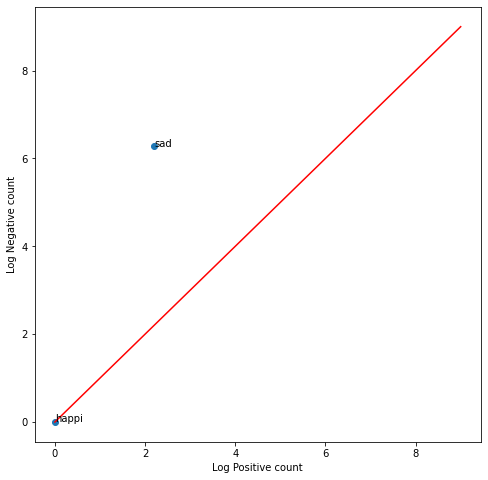

In [242]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

## 3.3 Bag of Word


the 2nd method to make text vectorization is called bag of words within a second it's called Lactaid.

Just like the 1st method, bag of words can be used to extract features from text documents.

For EX: The following tweet corpus: 

`tweet1:` I like to learn
`tweet2:` We all like and all want to learn

The idea of bag of words is to bring together all the words within a single entity called the **Bag**, without any grammatical or other considerations between the words. ==> Words are just words.

Once in the bag words can be transformed into a matrix, forming the different features of a vector.

Note that one word in the corpus creates only one feature, even if it appears multiple times.
Features are based on unique words.

tweets can now be transformed into a matrix as well.

The idea is simply to look at the first word in the matrix and check how may times it appears in the tweet.

EX: i like to learn, we all like and want to learn

<table>
<tr>
<th>words</th>
    <td>I</td>
    <td>All</td>
    <td>We</td>
    <td>like</td>
    <td>and</td>
    <td>want</td>
    <td>learn</td>
    <td>to</td>
  </tr>
  <th>features</th>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
  </tr>
   <th>Vector1</th>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
   <th>Vector2</th>
    <td>0</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>

</table>

The idea is simply to look at the first word in the matrix and check how may times it appears in the tweet.

VECTOR1/TWEET1:

1.   I -  In this case the word I appears once in the tweet. So the value in one column 1 will be 1.
2.    All - the word all does not appears in the tweet1, therefore the value in row 1 column 2, will be 0.
3.   we -  Same 0, and so on.

The text of tweet1 has now been converted to an array of features.
1. I -  Does not appears in tweet2.
2. All - the word 'all' appears twice in the sentence.
3. The value is 1 for all the remaining columns


That's it, we convert the 2 tweets into different arrays, arrays which only keeps information about the word present in the tweet, not any other, or any grammatical considerations.


#### Dimensions of Matrix - (No. of tweets * No of Unique words in corpus)

==> the more the number of unique words in the corpus the bigger the size of the matrix.

Now link the matrix dimensions with the impact of preprocessing . How much will normalizing text will impact the size of this matrix.

*  Corpus of tweet tokens used for the seconfd method

In [243]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from this Scikit-learn Library

In [244]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [245]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer = lambda x: x, preprocessor= lambda x:x ) # Vectorizer varibale
  #  There are 2 Parameters, the CountVectorizer is usually used to transfrom a rule tweets & thus incorporates it's own tokenizer & preprocessing utilities. 
  # As in our case, we created a very specific tokenizer, we shouln't use ScikitLearn Capabilities.
  #  This step ca be Bypassed by using a Lambda, a tokenizer, a preprocess our parameters.
# ScikitLearn will be fooled & will simply use the preprocess the sentences we feed.
# our vectorizer is now ready, but it still needs to be fitted with some data,
  cv_vect.fit(tweet_corpus)
  #  Fitting means, Looking at 2 tweets & featuring all the unique words & featuring them as a matrix.
#  If this fit methid is not clear yet, then just wait for a few more seconds.
  return cv_vect

* Use the `fit_cv` function  to fit the Bag-of-Words vectorizer on the corpus

In [246]:
cv_vect = fit_cv(corpus)
# print(cv_vect)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


* 
Get the vectorizer features (matrix columns)

In [247]:
ft = cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [248]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


* Convert a corpus to a matrix by using the vectorize

In [249]:
cv_mtx = cv_vect.transform(corpus) # By using the trasform function from ScikitLearn Which converts a list of lists into a matrix

NOTE: We can use .transform() &.toarray() at the same time, by chaining both the methods.

* Print the matrix shape

In [250]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


* Convert the matrix to an array

In [251]:
cv_mtx.toarray() # --> This array has all the frequencies of the words in the order as per our features list (here, ft)

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

* Transform a new tweet by using the vectorizer

In [252]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [253]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

Refrence Link: Important! --> Please view
<br>
<br>
https://nlp.stanford.edu/IR-book/html/htmledition/inverse-document-frequency-1.html

It is one of the most widely used techniques to represent text.


tf<sub>w,d </sub> --> Represents the frequency of each word in each document of the corpus. It is just computed by counting the number of time a specific word appears in a document & dividing this number by the total count of words in this document.

tf<sub>w,d </sub> =  n<sub>w,d </sub> / Sumation<sub>k</sub>(n<sub>w,d </sub>)

n<sub>w,d </sub> --> counting the number of time a specific word appears in a document

Sumation<sub>k</sub>(n<sub>w,d </sub>) --> total count of words in this document

EX:

`tweet1:` I like my cat <br>
`tweet2:` I love my dog <br>

We need to compute the frequency of each word in each document,
We can once again extract unique words from these 2 documnets.

<table>
<tr>
<th>
features
</th>
</tr>
<tr>
<td>
I
</td>
</tr>
<tr>
<td>
like
</td>
</tr>
<tr>
<td>
love
</td>
</tr>
<tr>
<td>
my
</td>
</tr>
<tr>
<td>
cat
</td>
</tr>
<tr>
<td>
dog
</td>
</tr>

</table>



Now let's try to compute the term frequency for words one in documnet one, which is the number of the word 'I' appears in document 1 divided / By the no. of words in document1.
This gives us 1/4.

The same applies to words 4 & 5, which appears once in this first document where word3 w3 & word6 w6 do not appear in this documnet. So the result is 
0/4 = 0.


<table>
<tr>
<th>
TF -  Total Frequency
</th>
</tr>
<tr>
<th>
features
</th>
<th>
d1
</th>
<th>
d2
</th>
</tr>
<tr>
<td>
I     w1
</td>
<td>
1/4
</td>
<td>
1/4
</td>
</tr>
<tr>
<td>
like     w2
</td>
<td>
1/4
</td>
<td>
0
</td>
</tr>
<tr>
<td>
love     w3
</td>
<td>
0
</td>
<td>
1/4
</td>
</tr>
<tr>
<td>
my       w4
</td>
<td>
1/4
</td>
<td>
1/4
</td>
</tr>
<tr>
<td>
cat       w5
</td>
<td>
1/4
</td>
<td>
0
</td>
</tr>
<tr>
<td>
dog       w6
</td>
<td>
0
</td>
<td>
1/4
</td>
</tr>

</table>

Here w<sub>n</sub> are word features & d<sub>n</sub> are document numbers.

2nd: Word Frequency --> This element is used to compute the weight of Swear words across all documents.
A bit like words, this element aimed at limiting the impact of words, appearing often in a set of documents.

This in order to focus on words appearing less often and which may carry more informationon the sentiment.

It is simply computed by taking the log of the ratio between the total number of documents and the number of documnets where a specific words appears.

The more a word appears in a document the lower idf will be.

idf<sub>w</sub> = log(N/df<sub>w</sub>)

N --> No. of Documnets <br>
df<sub>w</sub> --> No. of Documnets where the given word appears. 
<br>
<br>
EX:w<sub>1</sub> Word "I"

The word "I" appears 2 times in 2 documents.

w<sub>1</sub>  = Log(2/2) = 0
<br>
<br>
EX:w<sub>2</sub> Word "like"

The word "like" appears 1 time only in 2 documents.

w<sub>2</sub>  = Log(2/1) = 0.3


NOTE: IDF is only calculated at the word level not at the document level.


<table>
<tr>
<th>
 
</th>
<th style ="margin-left: 40px; padding-left: 20%" >
TF -  Total Frequency
</th>
<th>
 
</th>
<th>
IDF -  Inverse Document Frequency
</th>
</tr>
<tr>
<th>
features
</th>
<th>
d1
</th>
<th>
d2
</th>
</tr>
<tr>
<td>
I &nbsp &nbsp &nbsp &nbsp w1  
</td>

<td>
1/4
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w1
</td>
<td>
Log(2/2) = 0
</td>
</tr>
<tr>
<td>
like &nbsp &nbsp &nbsp &nbsp w2
</td>
<td>
1/4
</td>
<td>
0  &nbsp &nbsp &nbsp &nbsp w2
</td>
<td>
Log(2/1) = 0.3
</td>
</tr>
<tr>
<td>
love &nbsp &nbsp &nbsp &nbsp w3
</td>
<td>
0
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w3
</td>
<td>
Log(2/1) = 0.3
</td>
</tr>
<tr>
<td>
my &nbsp &nbsp &nbsp &nbsp w4
</td>
<td>
1/4
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w4
</td>
<td>
Log(2/2) = 0
</td>
</tr>
<tr>
<td>
cat &nbsp &nbsp &nbsp &nbsp w5
</td>
<td>
1/4
</td>
<td>
0  &nbsp &nbsp &nbsp &nbsp w5
</td>
<td>
Log(2/1) = 0.3
</td>
</tr>
<tr>
<td>
dog  &nbsp &nbsp &nbsp &nbsp w6
</td>
<td>
0
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w6
</td>
<td>
Log(2/1) = 0.3
</td>
</tr>

</table>


The words with IDF = 0 suggests that the given word does not add much meaning to the document.
Word4 "my" appears in all the documnets therefore it's IDF is 0 , which suggests that this word does not add much meaning to the IDF Document.

For each corpus word in each document , we can simply have the product of TF*IDF for each Document.

<table>
<tr>
<th>
 
</th>
<th style ="margin-left: 40px; padding-left: 20%" >
TF -  Total Frequency
</th>
<th>
 
</th>
<th>
IDF -  Inverse Document Frequency 
</th>

<th>
TF-IDF
</th>
</tr>
<tr>
<th>
features
</th>
<th>
d1
</th>
<th>
d2
</th>
<th>
</th>
<th>
d1
</th>
<th>
d2
</th>
</tr>
<tr>
<td>
I &nbsp &nbsp &nbsp &nbsp w1  
</td>

<td>
1/4
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w1
</td>
<td>
Log(2/2) = 0
</td>
<td>
0
</td>
<td>
0
</td>
</tr>
<tr>
<td>
like &nbsp &nbsp &nbsp &nbsp w2
</td>
<td>
1/4
</td>
<td>
0  &nbsp &nbsp &nbsp &nbsp w2
</td>
<td>
Log(2/1) = 0.3
</td>
<td>
0.075
</td>
<td>
0
</td>
</tr>
<tr>
<td>
love &nbsp &nbsp &nbsp &nbsp w3
</td>
<td>
0
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w3
</td>
<td>
Log(2/1) = 0.3
</td>
<td>
0
</td>
<td>
0.075
</td>
</tr>
<tr>
<td>
my &nbsp &nbsp &nbsp &nbsp w4
</td>
<td>
1/4
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w4
</td>
<td>
Log(2/2) = 0
</td>
<td>
0
</td>
<td>
0
</td>
</tr>
<tr>
<td>
cat &nbsp &nbsp &nbsp &nbsp w5
</td>
<td>
1/4
</td>
<td>
0  &nbsp &nbsp &nbsp &nbsp w5
</td>
<td>
Log(2/1) = 0.3
</td>
<td>
0.075
</td>
<td>
0
</td>
</tr>
<tr>
<td>
dog  &nbsp &nbsp &nbsp &nbsp w6
</td>
<td>
0
</td>
<td>
1/4  &nbsp &nbsp &nbsp &nbsp w6
</td>
<td>
Log(2/1) = 0.3
</td>
<td>
0
</td>
<td>
0.075
</td>
</tr>

</table>


The Intersting thing is that words appearing in the 2 documents for 0 weight, while this is not the case for words which are commonly found in these documents.

This is method is slightly different from Bag of words, Since this method gives more value to some words while Bag of Words, Simply vectorize all the words the exact same way.

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [254]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `TfidfVectorizer` from the Scikit-learn Library

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a `fit_tfidf` function used to build the TF-IDF vectorizr with the corpus

In [256]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor = lambda x:x, tokenizer = lambda x:x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus

In [257]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Get the Vectorizer features (matrix columns)

In [258]:
ft = tf_vect.get_feature_names()

In [259]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


* Print the matrix shape

In [260]:
print(tf_mtx.shape)

(6, 13)


* Convert the matrix to an array

In [261]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

NOTE: As we all know that the more rare the word is the higher the No. in the matrix will be.

* Transform a new tweet by using the vectorizer

In [262]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

### NOTE: Text representation is extremely important so that data can be used by a machine learning model

# `Section 4` Sentiment Model

### Why do we need a model ?

* We started this course by finding out what data we had at our disposal and why Twitter data was particularly interesting.

* We then learn how to clean up treats from top to bottom, discovering tools such as tokenization stemming and Lemmatization.

*  We finally moved on to Vectorizatoion and learned how to transform a list of tokens to a simple array of numbers and why it was so important for computers.
*   But we still miss the most important part, to  be able to build your own model used to predict the sentiment of unknown tweet with almost 90 percent accuracy.

#### Logistic Regression


The statistical model used to predict tweet sentiment is called logistic regression.

###### Regression - 
If you're not familiar with regression, you can see it as a way to estimate the relationship between a dependent variable and one or several explanatory variables.

EX: Relationship between your weight, which is the dependent variable and a 50/50 mix of how much you eat & hou much sport you do, which are the explanatory variables.


Logistic Regression is a particular form of regression because it can be used to model a binary dependent variable, just like a positive or negtiave sentiment for instance.

Use of logistic function to model a binary dependent variable.


In the graph, on the vertical axis we've a prediction for the dependent variable based on the specific value of "t". Which is represented by a sigmoidal curve.
Logistic Function Sigma(t)/ σ(t): 1/(1+ e<sup>-t</sup>).

* This function has the advantage of matching any real number "t" to a probability between [0,1]. 

1 -  Signifies that the event happend. <br>
0 - signifies it didn't occured at all.

This is very convienient in the case of binary variable like sentiments, because it is possible to in 2.
a. Results above 50% can be considered as +ve.
b. Results below 50% can be considered as -ve.
  
How is "t" actually computed.
t --> is the linear combination of several explanatory variables, together with some learned parameters

t =  	β<sub>0</sub> + β<sub>1</sub>x<sub>1</sub> + ... + β<sub>n</sub>x<sub>n</sub> <br>
Where `β` are learned parameters and `x` are explanatory input variables.<br>
 
The β are estimated so that the dependent variable (y) is best explained by the mix of explanatory variables.

So basically, if we can find a way to learn the β as the parameter & create a linear combination together with the vectors we created  in the last section, we could very easily compute "t" & feed it to the logistic function. 

EXAMPLE: Say we've the following tweet corpus for which we're trying to predict sentiment. Some tweets are for positive sentiments & some with negative sentiments. We don't know that yet as that's what we're trying to predict.

First step is obviously to clean up the tweets & turn them into numbers.

Let's use the Positive- Negative Frequencies method.
tweet1<br> --> Vectorized Array  --> [1350, 2214]
                   <br> `x`<sub>1</sub>     `x`<sub>2</sub> <br>
tweet2<br>
tweet3<br>
tweet4<br>
tweet5<br>

<br> `x`<sub>1</sub>  --> Presents the Sum of words present in a Positive Context.

<br> `x`<sub>2</sub> --> Presents the sum of words in a Negative context.

The Vectorized array actually represents a set of explanatory variables, a set of feaatures that can be used to predict the sentiment of a tweet.

We know that Logistic Regression can be used to convert a number to a binary prediction. 
Problem in this case is that we've 2 Numbers, not one.

Solution, comes withthe "t", remember t is a linear combination of explanatory variables, we could just create a linear combination of these features together with some learned parameters.

In the meantime simply consider them as given 

Learned Parameters:

β<sub>0</sub> = - 0.4783, β<sub>1</sub> = - 0.0034, β<sub>2</sub> = - 0.0032


<table>
<th>Tweet Corpus</th>
<th>Vectors</th>
<th>t</th>
<th>σ(t)</th>
<th>Sentiment</th>
<tr><td>tweet1</td><td>[1350, 2214]</td><td>-2.97</td><td>0.0487</td><td>Negative</td></tr> 
      <tr><td> </td> <td>x<sub>1</sub> &nbsp x<sub>2</sub></td></tr>
<tr><td>tweet2</td></tr> 
<tr><td>tweet3</td></tr> 
<tr><td>tweet4</td><td>[3561, 2145]</td><td>4.77</td><td>0.9915</td><td>Positive</td></tr> 
<tr><td>tweet5</td></tr> 
</table>

NOTE: Obviously if you decide to use another vectorization method with more features, the model would need to learn as many parameters.

the point is that Logistic regression needs a single number to output a probability.

### Parameters Estimation



EXAMPLE:

<table>
<th>Tweet Corpus</th><th></th> <th>Predictions σ(t)</th><th></th><th> Actual Sentiment </th>
<tr> <td></td><td>x<sub>1</sub> &nbsp &nbsp x<sub>2</sub></td></td></tr>
<tr><td>Tweet1</td><td>[1350,554]</td><td>-</td><td><--Loss--></td><td>+</td></tr>
<tr><td>Tweet2</td><td>[254,2214]</td><td>-</td><td>-</td></tr>
<tr><td>Tweet3</td><td>[2156,148]</td><td>-</td><td><--Loss--></td><td>+</td></tr>
<tr><td>Tweet4</td><td>[245,1876]</td><td>+</td><td><--Loss--></td><td>-</td></tr>
<tr><td>Tweet5</td><td>[445,1644]</td><td>-</td><td>-</td></tr>
<tr><td>Tweet6</td><td>[5350,224]</td><td>+</td><td>+</td></tr>
<tr><td>Tweet7</td><td>[4250,974]</td><td>-</td><td>+</td></tr>
<tr><td>Tweet8</td><td>[4762,248]</td><td>+</td><td>+</td></tr>
<tr><td>Tweet9</td><td>[125,1999]</td><td>+</td><td>-</td></tr>
<tr><td>Tweet10</td><td>[788,8456]</td><td>-</td><td>-</td></tr>

We're trying to build a  linear combination between these features & some β's are still undifined, so it can be fed to the logistic function & output some prediction.

t =  	β<sub>0</sub> + β<sub>1</sub>x<sub>1</sub> + ... + β<sub>n</sub>x<sub>n</sub> <br>

How to find the β Parameters is the real ppint here as it directly impacts the prediction.

Actually the optimal β parameters are found by minimizing the 'loss function'.

Without delving into details , note that, The loss is the difference between the model prediction & the actual sentiment.

In our case, I would , for instance, occur in case our model predicts a tweet as negative,where it is actually positive, as descibed in the table above as <--Loss-->.<br>

So by tweaking β as little by litle & computing "t" & σ(t) again & again, the prediction made by the model will get closer & closer to the actual sentiments, reducing the overall loss of the model.

We can consider this as an experiment to find the optimum conversion of each feature x<sub>1</sub> & x<sub>2</sub> [Dependent variables] in this case that produces the least error between the model prediction [Prediction] & the real sentiment of a tweet ["Actual Value"].

The avbove is the *Phase1* of Model Building & is called as the **Training Phase**.

In reality the training Phase is not carried out on the whole dataset, because ther is a *2nd phase* called **Testing Phase**.

This is why a dataset is usually split into 2 distinct sets a train set used during the train phase, usually representing around 80 percent of the dataset & a test set used in the testing phase, usually representing the testing phase remaining 20 percent.

Why do we require 2 different stages with 2 different sets ?

As we just saw, the training phase is used to review different examples present in the dataset & try to fit vector features as well as possible with the street sentiments by using β Coefficeints.

The Objective of training is to find the optimal set of weights & biases, so the model produces a low loss across all training examples.


Learned Optimal Parameters:

β<sub>0</sub> = - 0.4783, β<sub>1</sub> = - 0.0034, β<sub>2</sub> = - 0.0032


I insist on training as the model is fitted on training data on it is never trained on test data for , the simple reason theat the data is only used during the testing phase to measure of whether a trained model performs.

The goal of a model is to be used on a new data that has never been encountered before, if the model was trained on all the data, there would be no way to  easily verify it's effectiveness.

However, by keeping some model prarmeters aside, it becomes possibleto use the train model parameters to make predictions on this data.

More interestingly, it is possible to check & evaluate the predictions made by the model on the test set because the true predictions for the test set is actually known.

Remember Bothe train & test sets comes from the same dataset, & are made of  a tweet & a sentiment. 


```

Tweet2  -->  Model        (-)  = (-)   Real 
Tweet8  -->  Predictions  (-) != (+)  Sentiments

```

So it becomes very easy to check all models for data as this data is unknown to the training model. 




## Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [263]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

## **4.1** Train/Test Split


* Check what X and y looks like

In [264]:
print(x)
print(y)

[['layin', 'n', 'bed', 'headach', 'ughhhh', 'waitin', 'cal'], ['fun', 'certhemony', 'gloom', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'lik', 'friend'], ['hmmm'], ['charl', 'lov', 'miss'], ['sorry', 'least', 'friday'], ['chok', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rud'], ['u', 'watch', 'hil', 'london', 'u', 'real', 'tourt', 'week', 'week', 'lat', 'watch', 'itonlinelol'], ['sleepy', 'not', 'ev', 'lat', 'fail'], ['lady', 'gag', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convint', 'alway', 'want', 'sign', 'giv', 'damn', 'think', 'lost', 'anoth', 'friend'], ['way', 'hom', 'n', 'deal', 'w', 'und', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'keg', 'damn', 'feel', 'old'], ['sorry', 'peopl', 'rud', 'isaac', 'get', 'man', 'know', 'bet', 'lewd'], ['dam', 'serv', 'stil', 'nee', 'hit', 'koxp', 'pass'], ['fudg', 'bs', 'whol', 'pap', 'tir', 'ugh', 'hat', 'school', 'tim', 'sleep'], ['hat', 'cant', 'hat', 'hat'




* Import the train_test_split function from the Scikit-Learn package

In [265]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    random_state=0,
                                                    train_size =0.80) # We can specify the size of each bucket usually we use 80% for training & 20% for testingbut it all depends on the size of our dataset.
# If we've millions of records in your dataset, you may want to increase the percentage of training data 

* Print the size of these new variables

In [267]:
print("Size of X_train: {}".format(len(x_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(x_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(x_train)/(len(x_train)+len(x_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


* Print random tweets, just to verify everything goes as expected

In [268]:
id = random.randint(0,len(x_train))
# print(id)
print("Train tweet: {}".format(x_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['thank', 'fac', 'show', 'photoshoot']
Sentiment: 1


## **4.2** Logistic Regression


### 4.2.1 Model

* Import the `LogisticRegression` model from Scikit-Learn

x_train -> Setof Explanatory variables
<br>
y_train -> Set of Dependent Variables (in this case, Set of (correct) Sentiments)

In [269]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on x and y training data

In [270]:
def fit_lr(x_train, y_train):
    model = LogisticRegression()
    #  This model is simply be fitted by using x_train or y_train together with fit function.
    model.fit(x_train, y_train)
    return model 

REMEMBER: Fitting the model means finding the optimal set of β parameters, so the relationship between x_train, y_train is accurately described as much as possible.

###  **4.2.2** Pos/Neg Frequency

* Use the `build_freqs` function on training data to create a frequency dictionary
* Use the frequency dictionary together wth the `tweet_to_freq` function to convert x_train and x_test data to 2-d vectors.

In [271]:
  #  We've build the data dictionary, based on the train data set & not the entire set.
  # This is to prevent Data Leakage, as the model needs to be trained on training data only, & is not supposed to access any of the test data.
freqs= build_freqs(x_train, y_train)
#  Create a x_train Positive & negative Variable by converting each tweet in the train set to a frequency vector.
x_train_pn = [tweet_to_freqs(tweet, freqs) for tweet in x_train]
#  Similar for x_test set as well, to be used later.
x_test_pn = [tweet_to_freqs(tweet, freqs) for tweet in x_test]

* Fit the logistic Regression model on training data by using `fit_lr` function
* Print the model coefficients (betas and intercept)

 We can create a specific model variable & fit our x_train set with our y_train set.

Let's just bring our model coefficeient & intercept to see if it matches our expeactations 

In [272]:
model_lr_pn = fit_lr(x_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00069873 -0.0013417 ]] [-0.57631735]


The -0.5 + 0.0027 which are the β for Positive Frequencies & -0.002 which is the β for Negative Frequencies.

β's Coefficeint are opposite but of similar magnitude.

This means the prediction will mostly depend on the actual positive and negatice frequencies formed in the vector

Just check the β we had in this previous video, we will see that they're pretty similar.

### **4.2.3** Count Vector (Bag of Words)

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [273]:
cv = fit_cv(x_train)
#  We fit our count_vectorizer on test data only so there is no leakage
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Both x_train & x_test are represented as a matrix of numbers, as we saw in the previous as maatrix of Numbers.

* Fit the Logistic Regression model on training dat by using the `fit_lr` function

In [274]:
model_lr_cv = fit_lr(x_train_cv, y_train)
#  There will be as many β's as there are columns in the Matrix (Which is a pretty Big Number! in the current case!).

### **4.2.4** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform x_train & x_test data by using the vectorizer

Similar to Bag of words the TF-IDF Vectorizer can be used by fitting x_train
x_train_tf & x_test_tf can be created by transforming the both models

In [275]:
tf = fit_tfidf(x_train)
x_train_tf = tf.transform(x_train)
x_test_tf = tf.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [276]:
model_lr_tf = fit_lr(x_train_tf, y_train)

## **4.3** Performance Metrics

EXAMPLE: <br>
tweet1: Sad? Certainly not! --> MODEL -> Prediction ----> (-)ve
                        <br> Actual Sentiment ----> (+)ve   

<br> From the Above Model's incorrect prediction we can certainly see that how important it is to know  how well a model will performs.

It is possible to visualize this, using a tool called `The Confusion Matrix` <br>
This Matrix is seperated into four parts based on the prediction and the actual sentiment value.

#### The Confusion Matrix

First Quadrant --> Both the Actual Value & The Prediction Value are Negative. This is Called "True Negative" as prediction is truly negative.

Fourth Quadrant --> Both the Actual Value & The Prediction Value are Positive. This is Called "True Positive" as prediction is truly Positive.

Categories/Quadrants 1 & 4 represent the total count of correct predictions made by the model.

Second Quadrant --> It represents the Actual Negative  & Predcited Postive Values.
This is called "False Positive". In other words, it means that the tweeet was Falsely predicted as Positive while the actual value was Negative. It is also called `Type I Error` in Statistcs.<br>
Third Quadrant --> It represents the Actual Postive & Predcited Negative Values.
This is called "False Negative". In other words, it means that the tweeet was Falsely predicted as Negative. It is also called `Type II Error` in Statistcs.


EXAMPLE: Say We've trined our model & our trained model is evaluated it's performance by predicting the sentiment of 17000 tweets present in our test Dataset.



1.   Al 17k Tweets are fit to the modle for prediction.
2.   Predictions are then compared ti the actual sentiment and the Count is added in the correct Quadrant in the Confusion Matrix.

Obviously, the higher the Number of True Negative and True Positive the better, as it means the model has made the correct prediction.

The more we see False Positives & False Negative the more careful we must be while using the model.

The Confusion Matrix is very easy to use in order to derive a well-known Performance Matrix called Accuracy. 

Accuracy is simply defined as the Count of True Negative & True Positive Count, it actually simply represents the percentage if correct predictions made by the model


ACC =  TN + TP / TN +TP + FN +FP

In this case,

TN = 8476, TP = 7985, FN = 385, FP = 154

ACC = 96.8%

While the accuracy matrix is used very widely and works quite well for binary classification like sentiment analyses, we must note that it only works well with a balanced dataset.

For EX: If we had a dataset with 90% Positive Tweets & 10% Negative Tweets, so quite unbalanced, with such data the model could very easily and lazily achive 90% accuracy by always predicting positive sentiment & never predicting Negative Sentiment.

NOTE: Accuracy Mtrix only works well with balanced Dataset, as the one we've in our case.

Obviously, ther are tons of different metrics we can use to evaluate our model, it actually mostly depends on what is important to us for our application.

For Ex: We've built a model that detects Cancer, This time maybe it is more important ti limit the number of False negative predictions as failing to do so would leave patients with cancer undetected.

In such case, it is more appropirate to use the `Recall Metric (on False Negatives)` intead of the accuracy metric.

Conversly, If want to detect Spam Emails and not cancer it would be wise limiting the number of False Positives, as it would treat some spam emails as spam.

In such a case the `Precision metric (on False Positives)` will do a better job than recall or accuracy.

There is another soecific metric called the `F1 Score` and which mixes both `Precision` & `Recall`.

The accuracy metric gives us a feeling of how correctly our model performs, it predicts new & unseen data.

It's more than enough for a simple sentiment application.


* Import the `accuracy score` and  `Confusion matrix` from Scikit-Learn

In [277]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### 4.3.1. Positive/Negative Frequencies

* Use the fitted `model_lr_pn`(positive/negative frequencies) to predict x_test

In the precious sections we trained our model with the training set & that's how the logistic coefficeints were estimated.
<br>We will use the test dataset to evaluate our model, it wouldn't make sense to evaluate the model on  data  from which it was created anyway.
<br> Create a new variable y_pred_lr_pn to predict our test data using our model, this can be done very easily by using the predict() function.

In [278]:
y_pred_lr_pn = model_lr_pn.predict(x_test_pn)

* Print the model accuracy by comparing predictions and real sentiments

In [279]:
#  We can use the accuracy sore metric and check out the accuracy score metric & check how accurately our predictions match the actual sentiment of the test set.
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 61.08%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

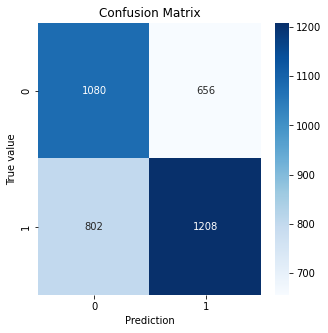

In [280]:
#  We plot the confusion matrix by using the y_pred_lr_pn function crreated above & the confusion matrix from scikit learn
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### **4.3.2** Count Vector

* Use the fitted `model_lr_cv`(Bag-of-Words) to predict x_test

In [281]:
#  We should predict our model by using the count vectorizer model & the test Dataset
y_pred_lr_cv = model_lr_cv.predict(x_test_cv)

* Predict the model accuracy by comparing predictions & real sentiments

In [282]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.17%


* Plot the confusion matrix by using the `plot_confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

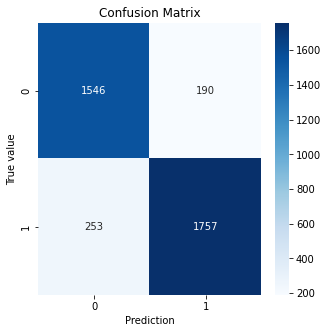

In [283]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

#### **4.3.3** TF-IDF

* Use the fitted `model_lr_tf`(TF-IDF) to predict x_test

In [284]:
y_pred_lr_tf = model_lr_tf.predict(x_test_tf)

* Print the model accuracy by comparing predictions & real sentiments

In [285]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.71%


* Plot the confusion matrix by using the plot `plot confusion` helper function

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

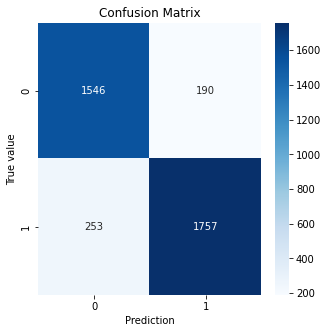

In [286]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

Well, the results for TF-IDF ar not much better as compared to Bag of words. We only see a bit of more "False Positves" & less "False Negatives".

The real conclusion is that Bag-of-Words & TF-IDF seems to be more acurate then Positive/Negative.

NOTE: This doesn't mean thaat these are the most accurate/ the best methods, but it seems sufficently accurate for the type of application we want to develop

### **4.4** Mini-Pipeline


* Final tweet used to check if the model works as well as expected
* **Note:** don't hesitate to input your own tweet!

In [287]:
your_tweet = """RT @yash_malhotra_: tune in for more amazing NLP content! 
And don't forget to visit https://mobile.twitter.com/Yash_malhotra_ ..."""

* Create a `predict_tweet` function used to pre-process, transform, and predict tweet sentiment

In [293]:
def predict_tweet(tweet):
  #  First, we need to preprocess our tweets by using our process tweets function.
  processed_tweet = process_tweet(tweet)
  #  We can then transform our preprocessed tweet into a vector of Numbers, by using our TF-IDF Vectorizer
  # Which appearsto be the most accurate method
  transformed_tweet = tf.transform([processed_tweet])
  # We can then simply use our trained logistic Regression model to make a prediction about the transformed tweet.
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"


* ... Predict your tweet sentiment by using the `predict_tweet` function!

In [294]:
predict_tweet(your_tweet)

Initial tweet: RT @yash_malhotra_: tune in for more amazing NLP content! 
And don't forget to visit https://mobile.twitter.com/Yash_malhotra_ ...
Post Twitter processing tweet: twitter_uesr: tune in for more amazing NLP content! 
And don't forget to visit  ...
Post Word processing tweet: twitter_uesr: tune in for more amazing nlp content! 
and do not forget to visit  ...


'Prediction is positive sentiment'